In [1]:
import csv
import sqlite3, pandas as pd
con=sqlite3.connect("socioeconomic.db")

df=pd.read_csv('http://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df=df.rename(columns={
    "community_area_name":"area",
    "percent_of_housing_crowded":"crowded_pct",
    "percent_households_below_poverty":"below_poverty",
    "percent_aged_16_unemployed":"unemployed16_pct",
    "percent_aged_25_without_high_school_diploma":"nodiploma25_pct",
    "percent_aged_under_18_or_over_64":"under18over64",
    "per_capita_income_":"income",
    "hardship_index":"hardship"})

df.to_sql("chicago_socioec",con, if_exists='replace',index=False,method="multi")
%load_ext sql

out=pd.read_sql_query("SELECT income, hardship FROM chicago_socioec LIMIT 5", con)
out

,income,hardship
0,23939,39.0
1,23040,46.0
2,35787,20.0
3,37524,17.0
4,57123,6.0


In [ ]:
df=pd.read_sql_query("""SELECT * FROM chicago_socioec""",con)
df.describe()

,ca,crowded_pct,below_poverty,unemployed16_pct,nodiploma25_pct,under18over64,income,hardship
count,77.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,77.000000
mean,39.000000,4.920513,21.739744,15.341026,20.330769,35.717949,25597.000000,49.506494
std,22.371857,3.658981,11.457231,7.499497,11.746514,7.284421,15196.405541,28.690556
min,1.000000,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,1.000000
25%,20.000000,2.325000,13.350000,9.200000,12.075000,32.150000,15804.750000,25.000000
50%,39.000000,3.850000,19.050000,13.850000,18.650000,38.050000,21668.500000,50.000000
75%,58.000000,6.800000,29.150000,20.000000,26.600000,40.500000,28715.750000,74.000000
max,77.000000,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,98.000000


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

cols=["income","crowded_pct","below_poverty","unemployed16_pct","nodiploma25_pct","under18over64","hardship"]
df_corr=df[cols].corr()["hardship"].sort_values(ascending=False)
df_corr

,hardship
hardship,1.000000
below_poverty,0.803267
nodiploma25_pct,0.802538
unemployed16_pct,0.792294
under18over64,0.690844
crowded_pct,0.649574
income,-0.849167


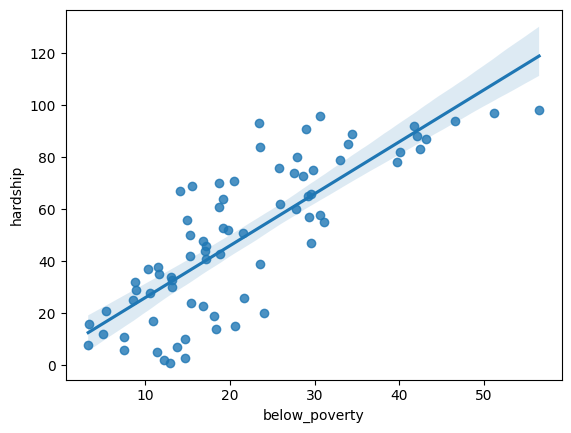

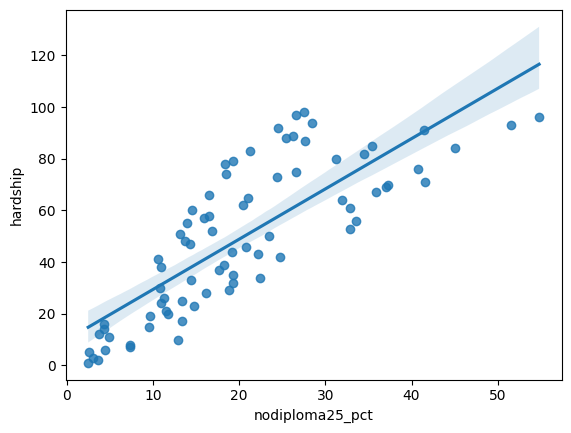

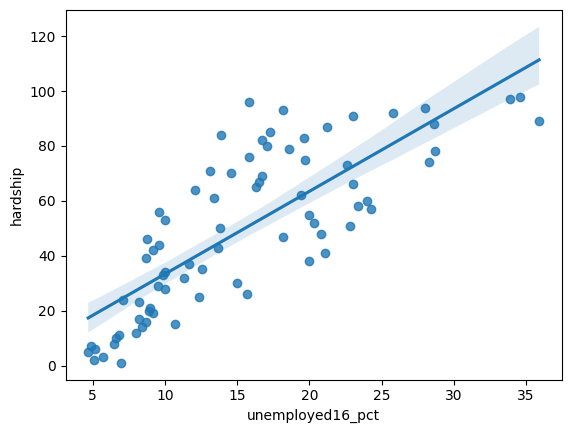

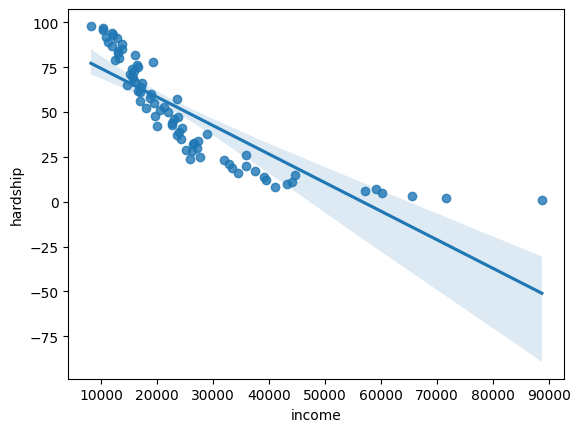

In [8]:
sns.regplot(data=df,x="below_poverty",y="hardship")
plt.show()

sns.regplot(data=df,x="nodiploma25_pct",y="hardship")
plt.show()

sns.regplot(data=df,x="unemployed16_pct",y="hardship")
plt.show()

sns.regplot(data=df,x="income",y="hardship")
plt.show()

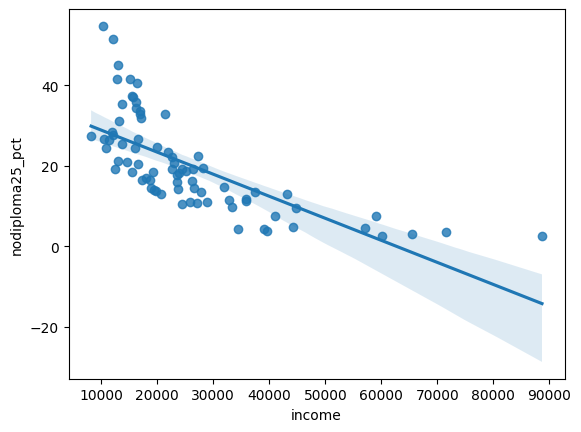

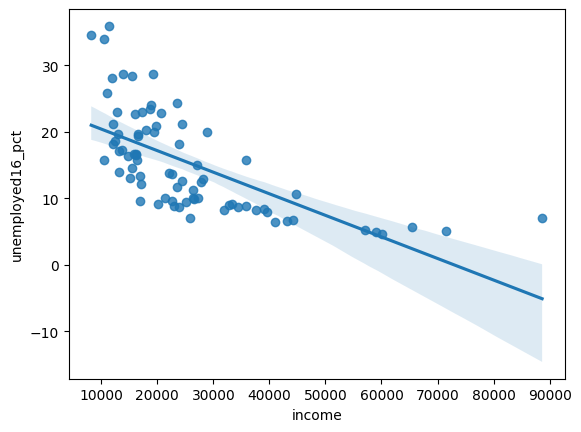

,income
income,1.000000
nodiploma25_pct,-0.709770
unemployed16_pct,-0.656619


In [25]:
incomecorr=["income","nodiploma25_pct","unemployed16_pct"]
df_incomecorr=df[incomecorr].corr()["income"]


sns.regplot(data=df,x="income",y="nodiploma25_pct")
plt.show()

sns.regplot(data=df,x="income",y="unemployed16_pct")
plt.show()
df_incomecorr